In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
 

Load FIFA Dataset

In [3]:
data=pd.read_csv('D:\\AI_track\\fifa_eda2.csv')

Exploring the Data

In [4]:
data.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [5]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [6]:
data.shape

(18207, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [8]:
data.describe()

ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   17955.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669943      6.908930      6.136496    5626.715434   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

               Wage  International Reputation   Skill Moves        Joined  \
count  18207.000000              18159.000000  18159.000000  18207.000000   
mean       9.731312                  1.113222      2.361308   2016.420607   
std       21.999290                  0.394031      0.756164      2.018194   
min        0.000000                  1.000000      1.000000   1991.000000   
25%        1.000000                  1.000000      2.000000   2016.000000   
50%        3.000000                  1.000000      2.000000   2017.000000   
75%        9.000000                  1.000000      3.000000   2018.000000   
max      565.000000                  5.000000      5.000000   2018.000000   

             Height        Weight  Release Clause  
count  18207.000000  18207.000000    18207.000000  
mean       5.946771    165.979129     4585.060971  
std        0.220514     15.572775    10630.414430  
min        5.083333    110.000000       13.000000  
25%        5.750000    154.000000      570.000000  
50%        5.916667    165.000000     1300.000000  
75%        6.083333    176.000000     4585.060806  
max        6.750000    243.000000   228100.000000

Text(0.5, 1.0, 'Missing Values')

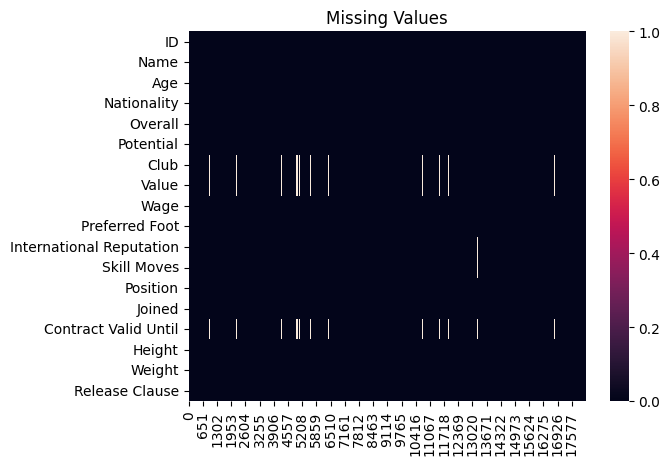

In [9]:
sns.heatmap(data.isnull().transpose())
plt.title('Missing Values')


In [10]:
data.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

Data Cleaning

Replace Null values in Value column with the mean value

In [12]:
data[data['Value'].isna()]

ID           Name  Age        Nationality  Overall  Potential  \
452    207439     L. Paredes   24          Argentina       80         85   
538    156713   A. Granqvist   33             Sweden       80         80   
568    229909       A. Lunev   26             Russia       79         81   
677    187347   I. Smolnikov   29             Russia       79         79   
864    153260         Hilton   40             Brazil       78         78   
...       ...            ...  ...                ...      ...        ...   
17539  234508       C. Singh   21              India       53         62   
17672  237744       R. Kawai   39              Japan       53         53   
17726   51963      T. Warner   44  Trinidad & Tobago       53         53   
17752  100899    S. Phillips   40            England       52         52   
18183   53748  K. Pilkington   44            England       48         48   

                             Club  Value  Wage Preferred Foot  \
452                           NaN    NaN   0.0          Right   
538                           NaN    NaN   0.0          Right   
568                           NaN    NaN   0.0          Right   
677                           NaN    NaN   0.0          Right   
864               Montpellier HSC    NaN  18.0          Right   
...                           ...    ...   ...            ...   
17539                         NaN    NaN   0.0          Right   
17672  Hokkaido Consadole Sapporo    NaN   1.0          Right   
17726          Accrington Stanley    NaN   1.0          Right   
17752                 Yeovil Town    NaN   1.0          Right   
18183            Cambridge United    NaN   1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
452                         2.0          4.0       CM    2016   
538                         2.0          2.0      LCB    2016   
568                         1.0          1.0       GK    2016   
677                         2.0          3.0       RB    2016   
864                         2.0          3.0       CB    2011   
...                         ...          ...      ...     ...   
17539                       1.0          2.0       LB    2016   
17672                       1.0          2.0       CB    2011   
17726                       1.0          1.0       GK    2018   
17752                       1.0          1.0       GK    2017   
18183                       1.0          1.0       GK    2018   

      Contract Valid Until    Height  Weight  Release Clause  
452                    NaN  5.916667   165.0     4585.060806  
538                    NaN  6.333333   185.0     4585.060806  
568                    NaN  6.166667   176.0     4585.060806  
677                    NaN  5.833333   154.0     4585.060806  
864             2019-01-01  5.916667   172.0     4585.060806  
...                    ...       ...     ...             ...  
17539                  NaN  6.250000   174.0     4585.060806  
17672           2021-01-01  6.000000   165.0     4585.060806  
17726           2019-01-01  6.333333   185.0     4585.060806  
17752           2022-01-01  6.083333   165.0     4585.060806  
18183           2023-01-01  6.166667   190.0     4585.060806  

[252 rows x 18 columns]

In [13]:
mean_value=data['Value'].mean()
data.fillna({'Value':mean_value},inplace=True)

Delete column with Null values in Club colomn 

In [14]:
data[data['Club'].isna()]

ID            Name  Age Nationality  Overall  Potential Club  \
452    207439      L. Paredes   24   Argentina       80         85  NaN   
538    156713    A. Granqvist   33      Sweden       80         80  NaN   
568    229909        A. Lunev   26      Russia       79         81  NaN   
677    187347    I. Smolnikov   29      Russia       79         79  NaN   
874    187607       A. Dzyuba   29      Russia       78         78  NaN   
...       ...             ...  ...         ...      ...        ...  ...   
17197  245164        V. Kaith   21       India       55         64  NaN   
17215  243131        K. Taimi   26     Finland       55         57  NaN   
17339  233526        S. Passi   23       India       54         63  NaN   
17436  236452  D. Lalhlimpuia   20       India       54         67  NaN   
17539  234508        C. Singh   21       India       53         62  NaN   

             Value  Wage Preferred Foot  International Reputation  \
452    2444.530214   0.0          Right                       2.0   
538    2444.530214   0.0          Right                       2.0   
568    2444.530214   0.0          Right                       1.0   
677    2444.530214   0.0          Right                       2.0   
874    2444.530214   0.0          Right                       2.0   
...            ...   ...            ...                       ...   
17197  2444.530214   0.0          Right                       1.0   
17215  2444.530214   0.0          Right                       1.0   
17339  2444.530214   0.0          Right                       1.0   
17436  2444.530214   0.0          Right                       1.0   
17539  2444.530214   0.0          Right                       1.0   

       Skill Moves Position  Joined Contract Valid Until    Height  Weight  \
452            4.0       CM    2016                  NaN  5.916667   165.0   
538            2.0      LCB    2016                  NaN  6.333333   185.0   
568            1.0       GK    2016                  NaN  6.166667   176.0   
677            3.0       RB    2016                  NaN  5.833333   154.0   
874            3.0       ST    2016                  NaN  6.416667   201.0   
...            ...      ...     ...                  ...       ...     ...   
17197          1.0       GK    2016                  NaN  6.166667   176.0   
17215          2.0       RB    2016                  NaN  6.333333   187.0   
17339          2.0       RM    2016                  NaN  5.750000   143.0   
17436          2.0       GK    2016                  NaN  6.000000   168.0   
17539          2.0       LB    2016                  NaN  6.250000   174.0   

       Release Clause  
452       4585.060806  
538       4585.060806  
568       4585.060806  
677       4585.060806  
874       4585.060806  
...               ...  
17197     4585.060806  
17215     4585.060806  
17339     4585.060806  
17436     4585.060806  
17539     4585.060806  

[241 rows x 18 columns]

In [15]:
data.dropna(subset=['Club'],inplace=True)

In [16]:
data.isna().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Preferred Foot               0
International Reputation    48
Skill Moves                 48
Position                     0
Joined                       0
Contract Valid Until        48
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [17]:
data[data['Contract Valid Until'].isna()].head(5)

ID         Name  Age Nationality  Overall  Potential  \
13236  177971   J. McNulty   33    Scotland       62         62   
13237  195380   J. Barrera   29   Nicaragua       62         62   
13238  139317     J. Stead   35     England       62         62   
13239  240437  A. Semprini   20       Italy       62         72   
13240  209462   R. Bingham   24     England       62         66   

                         Club  Value  Wage Preferred Foot  \
13236                Rochdale  120.0   1.0          Right   
13237         Boyacá Chicó FC  300.0   1.0          Right   
13238            Notts County  140.0   3.0          Right   
13239                 Brescia  425.0   1.0          Right   
13240  Hamilton Academical FC  400.0   1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
13236                       NaN          NaN       LB    2016   
13237                       NaN          NaN       LB    2016   
13238                       NaN          NaN       LB    2016   
13239                       NaN          NaN       LB    2016   
13240                       NaN          NaN       LB    2016   

      Contract Valid Until    Height      Weight  Release Clause  
13236                  NaN  5.946771  165.979129     4585.060806  
13237                  NaN  5.946771  165.979129     4585.060806  
13238                  NaN  5.946771  165.979129     4585.060806  
13239                  NaN  5.946771  165.979129     4585.060806  
13240                  NaN  5.946771  165.979129     4585.060806

In [18]:
data.dropna(subset=['Contract Valid Until'],inplace=True)


In [19]:
data.isna().sum()


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

EDA 

In [20]:
for col in data:
    print(col,':',data[col].nunique())

ID : 17918
Name : 16924
Age : 29
Nationality : 163
Overall : 48
Potential : 47
Club : 651
Value : 217
Wage : 143
Preferred Foot : 2
International Reputation : 5
Skill Moves : 5
Position : 27
Joined : 22
Contract Valid Until : 35
Height : 21
Weight : 57
Release Clause : 1245


How does the players spread around the world?

In [84]:
no_player_in_each_country=data['Nationality'].value_counts()
px.choropleth(no_player_in_each_country,locations=no_player_in_each_country.index,locationmode='country names',color=no_player_in_each_country.values,title='Spread of players around the World').show()
no_player_in_each_country

Nationality
England        1657
Germany        1195
Spain          1071
Argentina       935
France          911
               ... 
Malta             1
Belize            1
South Sudan       1
Indonesia         1
Botswana          1
Name: count, Length: 163, dtype: int64

Does the Nationalty affects the value of the players?

In [74]:
px.scatter(data,x='Nationality',y="Value",color_discrete_sequence=['green']).show()

Is there is a relation between the player's value and there club?

In [61]:

px.scatter(data,x='Club',y='Value')

Does the postion affects the value of the player?

In [25]:
value_per_postion=data.groupby('Position')['Value'].median().reset_index()
px.bar(value_per_postion,x='Position',y='Value',color='Position')


What is the proportion of players in each position recorded in the data?

In [73]:
count=data['Position'].value_counts();
px.pie(names=count.index,values=count.values)

Who are the top 10 players the highest values?


In [27]:
top_overall_players=data.sort_values('Value',ascending=False)[['Name','Value']].head(10)
px.histogram(top_overall_players,x='Value',y='Name',color='Name')

Who are the top 10 players by wage?

In [28]:
top_10_wage=data.sort_values('Wage',ascending=False)[['Name','Wage']].head(10)
px.bar(top_10_wage,x='Wage',y='Name',color='Name')

Who are the players with the highest release clauses?

In [29]:
highest_release_clauses_players=data.sort_values('Release Clause',ascending=False)[['Name','Release Clause']].head(10)
px.bar(highest_release_clauses_players,x='Release Clause',y='Name',color='Name')

Who are the top 20 players with the highest overall rating?


In [30]:
top_overall_players=data.sort_values('Overall',ascending=False)[['Name','Overall']].head(20)
px.bar(top_overall_players,x='Name',y='Overall',color='Name')

What's the Distribution of the Players hights and weight?

In [31]:
px.box(data['Height'],title='Hight Distribution').show()
px.box(data['Weight'],title='Wieght Distribution').show()


Who are the top 10 players according to their heights

In [32]:
top_10_height=data.sort_values('Height',ascending=False)[['Name','Height']].head(10)
px.bar(top_10_height,x='Name',y='Height',color='Name')

Which foot is more prefered?

In [33]:
px.pie(names=data['Preferred Foot'])

Deos the feet moves affect skill moves?

In [58]:
Foot_skill=data.groupby(['Preferred Foot','Skill Moves']).size().unstack()
px.bar(Foot_skill,labels={'Skill Moves': 'Skill Moves', 'Preferred Foot': 'Preferred Foot', 'value':'Count'},barmode='group').show()
Foot_skill

Skill Moves      1.0   2.0   3.0  4.0  5.0
Preferred Foot                            
Left             205  1931  1736  274   16
Right           1787  6512  4786  637   34

Does the age affects the player value?


In [42]:
px.histogram(data,x='Age',y='Value',color='Age')

Is players' ages affect thier potential? 

In [48]:
px.histogram(data,x='Age',y='Potential',color='Age')

How does every column in the set Correlated to the other?

Text(0.5, 1.0, 'Correlation Matrix')

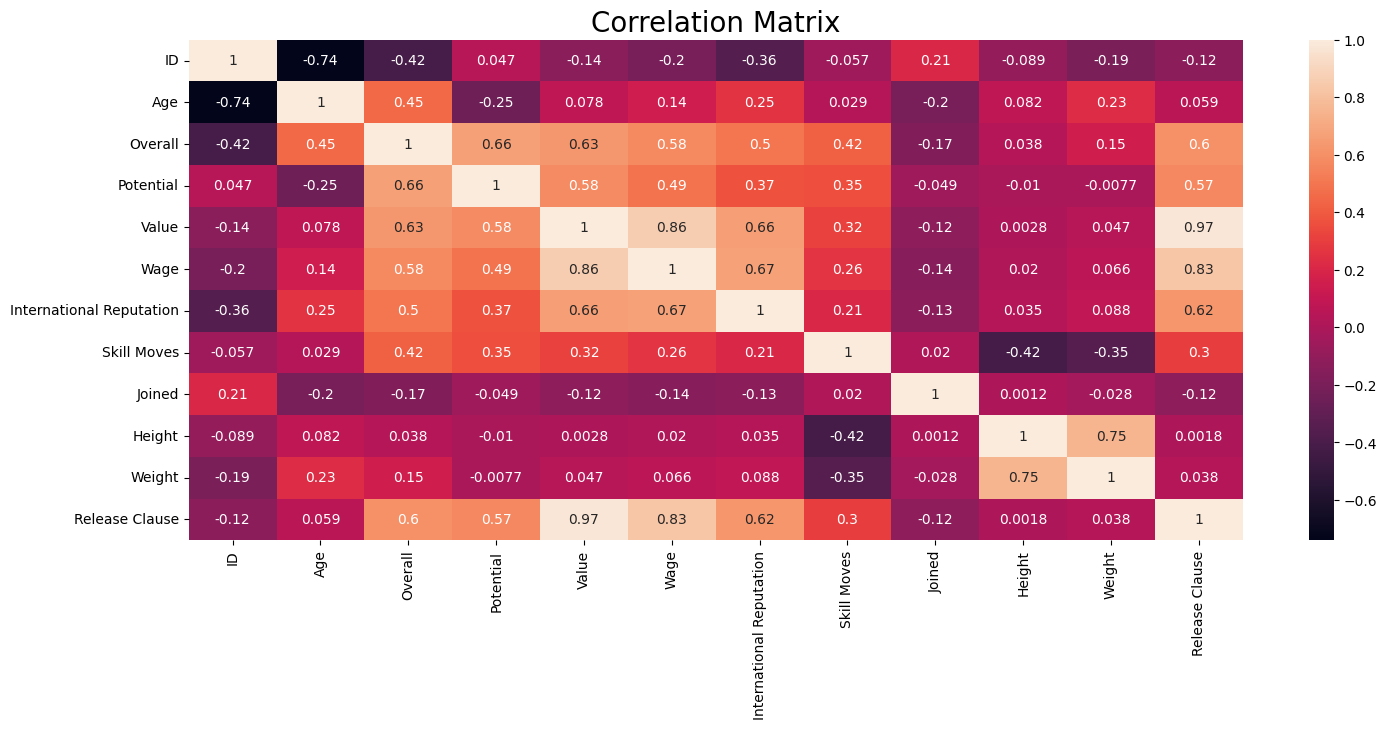

In [70]:

plt.figure(figsize=(17,6.5))
numirc_data=data.select_dtypes(include='number')
sns.heatmap(numirc_data.corr(),annot=True,fmt='.2g')
plt.title("Correlation Matrix",fontsize=20)
